## Rozwiązywanie równań nieliniowych 
Funkcje testowe: 
$$f_1(x) = 2x^2 -2x + 1$$
$$f_2(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x^5$$
$$f_3(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f_4(x) = 3*x + sin(x) - cos^3(x)$$
$$f_5(x) = 27x^3−3x+1$$

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.misc import derivative


f1 = lambda x: 2*x**2 - 2*x + 1
f1_name = "f(x)=2x^2−2x+1"
f2 = lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5
f2_name = "f(x)=−26+85x−91x^2+44x^3−8x^4+x^5"
f3 = lambda x: pow(4, x) - pow(3, 2*x) + pow(2, 3*x)
f3_name = "f(x)=4^x−3^(2x)+2^(3x)−1"
f4 = lambda x: 3*x + math.sin(x) - math.cos(x)**3
f4_name = "f(x)=3∗x+sin(x)−(cos(x))^3"
f5 = lambda x: 27*x**3 - 3*x + 1
f5_name = "f(x)=27x^3−3x+1"


def to_chart(fun, a, b, n, func_name):
    x_axis = np.linspace(a, b, n)
    plt.plot(x_axis, np.vectorize(fun)(x_axis), label=func_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(func_name)
    plt.grid()
    plt.show()

### Zadanie 1:
Zaimplementuj metodę bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

In [21]:
def bisection_method(a, b, fun, n):  # n is the max number of allowed iterations
    if fun(a) * fun(b) > 0:
        # end function, no root
        return None, None
    else:
        d = b - a
        x_0 = 1
        for i in range(n):
            x_0 = (a + b) / 2.0
            if fun(x_0) == 0:
                e = d / 2**i
                return x_0, e
            elif fun(a) * fun(x_0) < 0:
                b = x_0
            else:
                a = x_0

        e = d / 2**n
        return x_0, e


def compute():
    to_chart(f1, -2, 2, 100, f1_name)
    x_0, e = bisection_method(-2, 2, f1, 1000)
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f2, 0, 1, 100, f2_name)
    x_0, e = bisection_method(0, 1, f2, 100)
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f3, -4, 2, 100, f3_name)
    x_0, e = bisection_method(-4, 2, f3, 100)
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f4, -1, 1, 100, f4_name)
    x_0, e = bisection_method(-1, 1, f4, 100)
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f5, -1, 1, 100, f5_name)
    x_0, e = bisection_method(-1, 1, f5, 100)
    print(f"Root = {x_0}")
    print(f"E = {e}")

#### Przedział obejmujący wykres jest jednocześnie przedziałem poszukiwań.

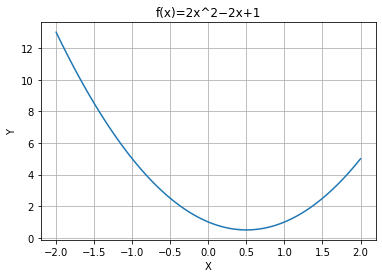

Root = None
E = None


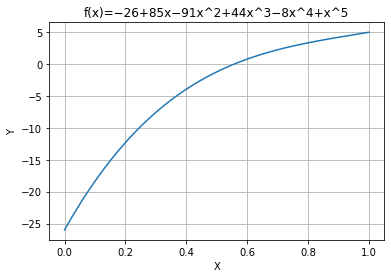

Root = 0.5570255162865259
E = 7.888609052210118e-31


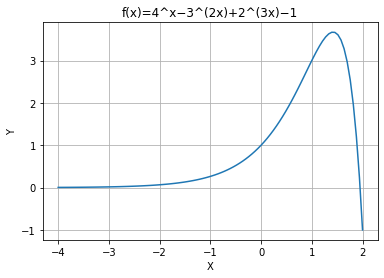

Root = 1.951901689939746
E = 2.6645352591003757e-15


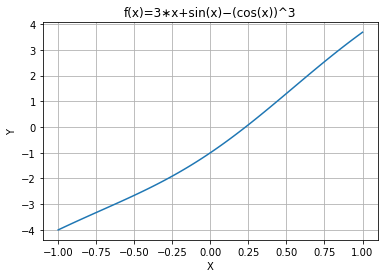

Root = 0.2310996034771355
E = 5.551115123125783e-17


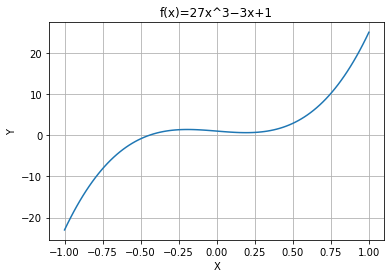

Root = -0.4415726524149154
E = 1.5777218104420236e-30


In [22]:
compute()

### Obserwacje

Metoda bisekcji jest prostym algorytmem, pozwalającym szukać miejsc zerowych funkcji. W zastosowanej przeze mnie impelementacji liczba dozwolnych iteracji w poszukiwaniu miesjca zerowego jest z góry określona. Na jej podstawie też określam błąd E, ze wzoru 
$$E=b_n-a_n= ... =\frac{a_0-b_0}{2^N}$$
gdzie N to liczba wykonanych interacji. Im więcej iteracji tym mniejszy błąd. Błąd E określa rozmiar przedziału, w którym znajduje się rozwiązanie (maksymalna wartość, o ktorą mogliśmy się pomylić).
Krtyterium zbieżnośći jest dobre (błąd E jest znacznie mniejszy od znalezionego rozwiązania) dla wszystkich powyższych funkcji posiadających rozwiązania, jednak dla funkcji $f_3$ i $f_4$ szybkość zbieżności jest zdecydowanie większa niż dla $f_2$ i $f_5$, gdyż E jest o ok 15 rzędów wielkości mniejsze.

### Zadanie 2: 
Zaimplementuj metodę Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [28]:
def newton_raphson(fun, x, n):
    for i in range(n):
        if derivative(fun, x) == 0:
            return "None"
        h = fun(x) / derivative(fun, x)
        x = x - h

    return x


def comparison_2():
    to_chart(f1, -2, 2, 100, f1_name)
    print("Initial guess: 0")
    print(f"Root: {newton_raphson(f1, 0, 100)}")

    to_chart(f2, 0, 1, 100, f2_name)
    print("Initial guess: 1")
    print(f"Root: {newton_raphson(f2, 1, 100)}")

    to_chart(f3, -4, 2, 100, f3_name)
    print("Initial guess: 1")
    print(f"Root: {newton_raphson(f3, 1, 100)}")

    to_chart(f4, -1, 1, 100, f4_name)
    print("Initial guess: 0")
    print(f"Root: {newton_raphson(f4, 0, 100)}")

    to_chart(f5, -1, 1, 100, f5_name)
    print("Initial guess: 0")
    print(f"Root: {newton_raphson(f5, 0, 100)}")

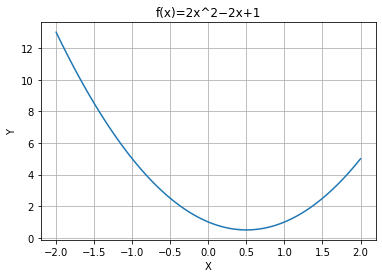

Initial guess: 0
Root: None


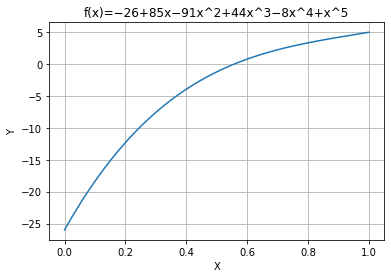

Initial guess: 1
Root: 0.5570255162865262


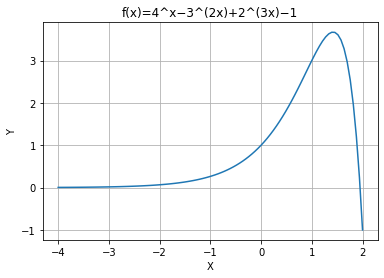

Initial guess: 1
Root: 1.9519016899400057


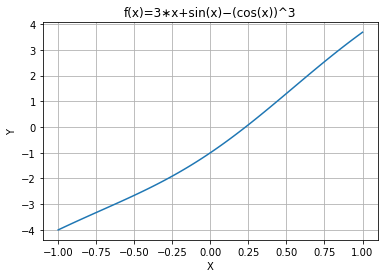

Initial guess: 0
Root: 0.2310996034771355


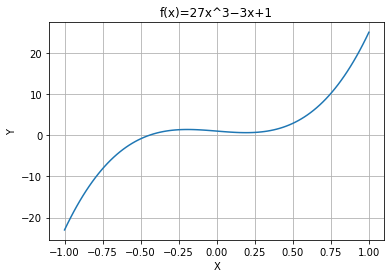

Initial guess: 0
Root: -0.4415726524149153


In [27]:
comparison_2()

### Obserwacje

Przedziały pozostały niezmienione zwględem tych z metody biskecji. Tu również ważna jest zasada aby obrany przedzaił spełniał warunek $$f(a)*f(b)<0$$

### Zadanie 3: 
Zaimplementuje metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  Porównaj dokładność wszystkiech czterech metod.